 # Lab 5
 # Yuletide

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

Late in the nineteenth century, Udny Yule was concerned to investigate the "various causes that one may conceive to effect changes in the rate of pauperism."

In particular, Yule wanted to clarify the role, if any, of differing amounts of "out-relief" in causing greater pauperism. The [Poor Laws of 1834](http://www.workhouses.org.uk/poorlaws/newpoorlaw.shtml) were to discourage the population from "wanting" to be poor, by forcing anyone deemed capable of working in workhouses with deliberately harsh conditions.  "out-relief," the granting of funds for survival, was to be forbidden to all able-bodied adults and the families, in favor of "In-relief" for those working in such workhouses. 


Yule's original paper: Yule, G. Udny. 1899. ["An Investigation into the Causes of Changes in Pauperism in England, Chiefly during the Last Two Intercensal Decades."](http://www.jstor.org.ezproxy.cul.columbia.edu/stable/2979889) *Journal of the Royal Statistical Society* 62 (Part II):249-295. 

He doesn't give all his data, but gives one important example. 

![example](https://i.imgur.com/7DTIfZK.png). 



In [2]:
pauper_data=pd.read_csv("https://raw.githubusercontent.com/data-ppf/data-ppf.github.io/master/labs/lab5/Yule_tableXIX.csv", index_col=0)

In [3]:
pauper_data.head()

,paup,out,old,pop
Kensington,27,5,104,136
Paddington,47,12,115,111
Fulham,31,21,85,174
Chelsea,64,21,81,124
St. George’s,46,18,113,96


Let's make a scatter matrix, something not readily available to Mr. Yule

<IPython.core.display.Javascript object>


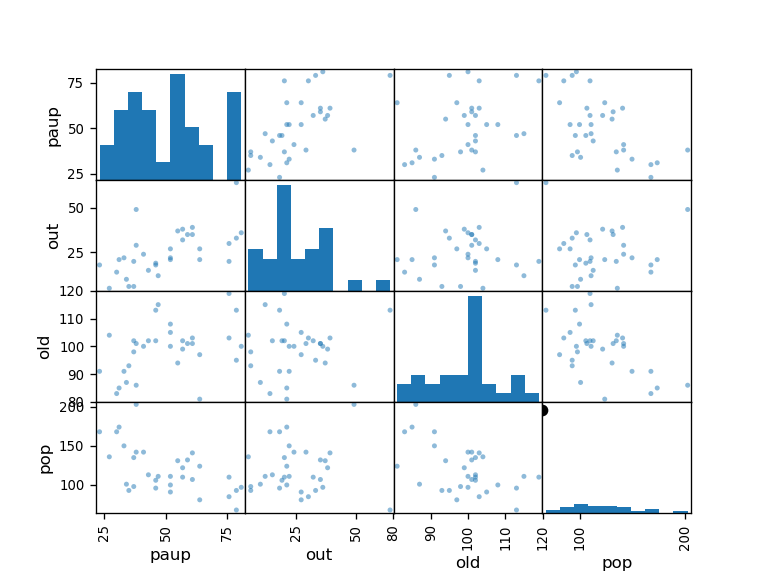

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f74727b8be0>,
      dtype=object)

In [4]:
%matplotlib notebook
from pandas.plotting import scatter_matrix
scatter_matrix(pauper_data)

## Least Squares and Regression

Thanks to high level packages, it's very, very easy to do simple linear regression using least squares.  

Linear Regression IN GENERAL:

$y = \beta_n x_n + ... + \beta_1 x_1 + \mu_0$

Linear Regression FOR JUST ONE VARIABLE:

$y = \beta_1 x_1 + \mu$ 

where $\beta_1$ is the slope, $x$ are the observations, and $\mu$ is the y-intercept.  

So, friends, let's regress for a minute. Let's try connecting just two of the variables in the scatter plot above.
What do you choose?


In [5]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()

To use this, we must identify the value to be predicted (called y) and the data to be used to do the predicting (called X). 

In [6]:
X=pauper_data["out"] # this will be subsequently known as our training data or training set

In [7]:
X=X.values.reshape(-1,1)

In [8]:
y=pauper_data["paup"] 

Given these choices, we ask `sklearn` to use the `LinearRegression()` to fit the data to produce the data. Poor Mr. Yule would have had someone to do all this by hand.

In [9]:
regression_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<IPython.core.display.Javascript object>


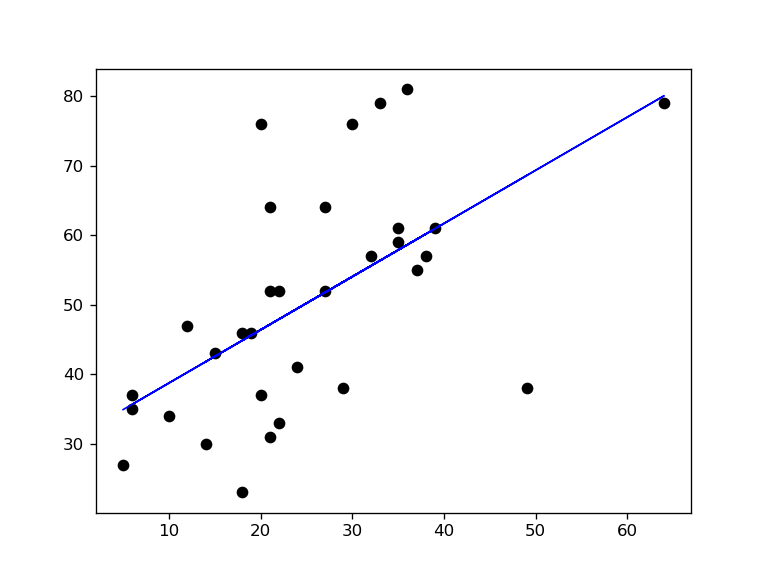

In [12]:
%matplotlib notebook
plt.scatter(X, y,  color='black')
plt.plot(X, regression_model.predict(X), color='blue', linewidth=1)
plt.show()

In [11]:
regression_model.predict(55)

array([73.1858236])

In [13]:
regression_model.score(X,y)

0.35287454263506846

.35 is, let's say, not a strong vote in favor in our model. This is $R^2$.

### Your turn: regress a bit

### Multivariable regressing

Now, Mr. Yule, was concerned that something else might be the underlying cause of the changes in outrelief. 

![Yule_multiple](https://i.imgur.com/go8cXCd.png)


We can undertake something like his analysis with ease, using almost identical syntax.


First, let's make `X` all the columns EXCEPT the `paup` data. `X` can be one column or multiple ones.

In [14]:
X=pauper_data.drop("paup", axis=1)   

# axis=1 means a column in this context. Almost no one ever remembers which is column and which rows, so just check yer data.

And now, for `y` just that first column.

In [15]:
y=pauper_data["paup"]

And fit our model, using the same syntax as before. 

In [16]:
regression_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

This is finding all the $\beta_i$ in the general linear regression

$y = \beta_n x_n + ... + \beta_1 x_1 + \mu_0$


Within `sklearn`, we can find those $\beta_i$ coefficients using the `.coef_` method.



In [17]:
regression_model.coef_

array([ 0.7520945 ,  0.055602  , -0.31073832])

In [18]:
regression_model.coef_[0]

0.7520945011431508

In [19]:
regression_model.score(X,y)

0.6971837706639319

.70? 'Zwounds, we've discovered rock-bottom truth!


Note for the reader: Yule gives slightly different values (.755, -.022 and -.322) than rederivations.  

Here's how Yule presents his coefficients:

![Yule coefficients](https://i.imgur.com/3IiDti3.png)


Yule concludes his paper, with a series of claims quoted by Desrosieres:

![Yule conclusions](https://i.imgur.com/3TwxM3G.png) 



Our Freedman reading challenges Yule's conclusions.
>At best, Yule has established association. Conditional on the covariates, there is a positive association between  $\Delta$Paup and $\Delta$Out. Is this association causal? If so, which way do the causal arrows point? For instance, a parish may choose not to build poor- houses in response to a short-term increase in the number of paupers. Then pauperism is the cause and outrelief the effect. Likewise, the number of paupers in one area may well be affected by relief policy in neighboring areas. Such issues are not resolved by the data analysis. Instead, answers are assumed *a priori*. Although he was busily parceling out changes in pauperism – so much is due to changes in out-relief ratios, so much to changes in other variables, so much to random effects – Yule was aware of the difficulties. With one deft footnote (number 25), he withdrew all causal claims: ‘Strictly speaking, for “due to” read “associated with”.’

![Yule weasel](https://i.imgur.com/r7ZPsKH.png)

The causal situation is deeply problematic, as Freedman explains:
>To make causal inferences, it must be assumed that equations are stable under proposed interventions. Verifying such assumptions – without making the interventions – is problematic. On the other hand, if the coefficients and error terms change when variables are manipulated, the equation has only a limited utility for predicting the results of interventions.

